In [1]:
!pip install gym matplotlib numpy

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import time
from collections import namedtuple
from statistics import mean

import gym
import matplotlib.pyplot as plt
import numpy as np

In [3]:
GameResult = namedtuple('GameResult', 'total_reward, log')


def cart_pole_v1(get_action, *, render=False):
    env = gym.make("CartPole-v1")
    observation, total_reward, done, log = env.reset(), 0, False, []
    while not done:
        if render:
            env.render()
            time.sleep(0.03)
        action = get_action(observation, env)
        observation, reward, done, info = env.step(action)
        log.append(observation)
        total_reward += reward
    env.close()
    return GameResult(total_reward, log=list(np.array(k) for k in zip(*log)))

In [4]:
def pole_angle_agent(observation, env):
    cart_position, cart_velocity, pole_angle, pole_angular_velocity = observation
    return int(pole_angle > 0)

# Investigate

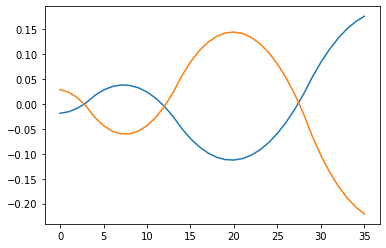

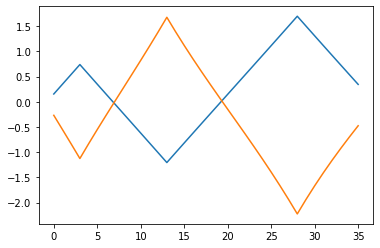

In [5]:
game_result = cart_pole_v1(pole_angle_agent, render=True)
cart_position, cart_velocity, pole_angle, pole_angular_velocity = game_result.log

plt.plot(cart_position)
plt.plot(pole_angle)
plt.show()
plt.plot(cart_velocity)
plt.plot(pole_angular_velocity)
plt.show()

# Performance measure

In [6]:
agents = [
    ('random', lambda observation, env: env.action_space.sample()),
    ('pole_angle', pole_angle_agent),
]
for name, agent in agents:
    print(name, mean(cart_pole_v1(agent).total_reward for _ in range(3000)))

random 22.400333333333332
pole_angle 41.98566666666667
